In [1]:
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import re

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

from gensim import corpora, models
from nltk.corpus import stopwords
np.random.seed(42)
from sklearn.metrics import silhouette_score

from transformers import pipeline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [37]:
from wordcloud import WordCloud
import seaborn as sns

In [2]:
import torch

In [9]:
! pip install torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [8]:
!pip install git+https://github.com/pmbaumgartner/setfit -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from setfit import SetFitClassifier

In [6]:
clf = SetFitClassifier("all-mpnet-base-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
df = pd.read_excel('output-2.xlsx')

In [15]:
Topics = [ "Errors",
            "Cheque Deposit",
            "2SV",
            "Login and Logout Issues",
            "Biometric Login",
            "Fee",
            "Request New Card",
            "International Money Movement",
            "Save and Share Statements",
            "Quick Balance",
            "Credit Score",
            "Application Performance",
            "Investments",
            "Email Money Transfer",
            "Info Alerts",
            "Accessibility",
            "Rewards",
            "Appointment Booking",
            "Budgeting",
            "Chat" ]

In [16]:
# Filter the DataFrame to include only the specified topics
filtered_df = df[df['Suggested_Topic'].isin(Topics)]

# Count the occurrences of each topic
topic_counts = filtered_df['Suggested_Topic'].value_counts().reset_index()

# Rename columns for clarity
topic_counts.columns = ['TOPIC_NAME', 'NUMBER_OF_OCCURRENCE']

# Sort the DataFrame by number of occurrences and then by topic name
topic_counts = topic_counts.sort_values(by=['NUMBER_OF_OCCURRENCE', 'TOPIC_NAME'], ascending=[False, True])

# Assign ranks based on the sorted order
topic_counts['RANKING'] = range(1, len(topic_counts) + 1)

In [17]:
df1 = filtered_df[filtered_df['Rating']>3]

In [18]:
df1

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review,Suggested_Topic,Similarity
1,4316,2023-02-03 00:32:23,4,en,20.46.2,0,Great except the cheque deposit feature has fa...,Cheque Deposit,0.907210
3,5216,2021-08-13 18:10:08,5,en,20.29.0,0,Very easy and convenient! The cheque deposit f...,Cheque Deposit,0.902494
6,8494,2021-09-17 19:02:27,4,en,20.30.1,1,Need improvement in eCheque Deposit. The one o...,Cheque Deposit,0.899882
7,8155,2022-03-26 19:25:41,4,en,20.36.2,0,"Overall a good APP, but unable to deposit cheq...",Cheque Deposit,0.898458
23,489,2022-07-02 09:30:37,4,en,20.34.1,0,The app is easy to use but I hate the mandator...,2SV,0.891415
...,...,...,...,...,...,...,...,...,...
9103,7416,2024-01-12 08:50:28,5,en,2311.0.1,0,I trust no other Bank with my financial goals 👍✌🏼,Investments,0.657579
9119,1678,2023-09-04 21:07:28,4,en,2308.0.0,0,Do not post any personal information you do no...,Save and Share Statements,0.653776
9125,3265,2023-04-05 19:05:48,5,en,20.48.0,0,I don't want my personal info out there.,Info Alerts,0.652453
9126,3998,2023-03-24 16:56:36,5,en,20.47.0,0,bank,Cheque Deposit,0.652449


In [28]:
#negative
sample_reviews_01 = [
    "2 step verification sucks. Would be nice to have access to my bank account on all my devices but it only lets me have access to bank account on 1 device. Would give less stars if possible.",
    "The 2 step verification is annoying",
    "needs 2 step verification, why",
    "Great except the cheque deposit feature has failed me almost every time I've tried to use it over the years.",
    "The latest update on the app makes depositing cheques a hassle. It is very glitchy and hard to use. When you run a very busy business, there is no time to try and make the app operate. It is a half hour drive to go to bank and out of my way to do deposits. Please update this soon.",
    "Changing my review. I use the deposit a cheque option frequently until recently. Every time I try to use it now it freezes. Very frustrating",
    "The app glitches so much I can't even get past the login most of the time and have to uninstall and reinstall quite often",
    "0	The app is constantly showing errors at log in. Very frustrating. The search function doesn't work well. A log of etransfer history would be a helpful addition.",
    "App failed to initiate Interact deposits several times and also reset my notifications every update. Very frustrating as I missed payments.",
    "The new deposit a cheque part of the app is horrible . Takes so long to capture photos properly. Please fix this",
    "You guys broke the deposit feature. Please fix this",
    "WORSE APP!!!!!! NOTHING WAS WRONG WITH IT BEFORE. DID NOT GET A 2 STEP NOTIFICATION AND IT IS NOT SENDING ME ANYTHING. YOU GUYS ARE PATHETIC. SERIOUSLY WHO RUNS THAT PLACE A BUNCH OF 10 YEAR OLDS? FIX THE DAMN PROBLEM DON'T MAKE DO IT BECAUSE I DIDN'T CREATE THIS PROBLEM MORONS!!!!!!!!"


]
#positive
sample_reviews_00 = [
    "Very easy and convenient! The cheque deposit features are so useful!",
    "This app is very good I don't have to write my password because of biometric system and it's easy to use",
    "I love this app, really easy to use, able to picture deposit a cheque",
    "Great app and easy to use would nice if I can see how to invest money",
    "This is a great banking app. From checking balance to depositing a cheque, it does it all.",
    "Now I can use my fingerprints to log on, just made my experience even better",
    "Very user friendly & I like the credit score user app within my account. It helps keep me on track. Thank you Scotia bank.",
    "The App itself works well with sufficient security measures in place. However the app layout and user experience could be better.",
    "The credit score checker is nice.",
    "Great app, very useful for accepting e transfers and working with money. Recommend."
]

In [29]:
topics_importance_1 = [
    {"sequence": review, "label": "Negative"} for review in sample_reviews_01
]
topics_importance_2 = [
    {"sequence": review, "label": "Positive"} for review in sample_reviews_00
]

In [30]:
combine_df = (
    topics_importance_1 + topics_importance_2
)

In [31]:
df_few_shot_examples_2 = pd.DataFrame(combine_df)

In [32]:
review_2 = df_few_shot_examples_2['sequence'].to_list()
label_2 = df_few_shot_examples_2['label'].to_list()

In [33]:
clf.fit(review_2,label_2)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
filtered_df['sentiment'] = clf.predict(filtered_df['Review'].to_list())

In [47]:
filtered_reviews = filtered_df[filtered_df['sentiment'] == 'Negative']

In [48]:
filtered_reviews

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review,Suggested_Topic,Similarity,sentiment
0,3105,2021-02-15 11:19:10,1,en,20.23.0,2,Have a hard time logging into my app no matter...,Login and Logout Issues,0.919773,Negative
1,4316,2023-02-03 00:32:23,4,en,20.46.2,0,Great except the cheque deposit feature has fa...,Cheque Deposit,0.907210,Negative
2,8709,2023-09-15 21:01:10,1,en,2308.0.0,0,Was good at first but lately ive been having i...,Login and Logout Issues,0.904932,Negative
4,5436,2021-12-15 15:04:14,3,en,20.34.3,7,Cheque deposits are broken now - this used to ...,Cheque Deposit,0.901155,Negative
5,4709,2023-06-08 21:48:07,3,en,2305.1.0,0,The app itself is quite intuitive and good to ...,Login and Logout Issues,0.900247,Negative
...,...,...,...,...,...,...,...,...,...,...
9141,8926,2023-02-07 11:43:17,1,en,20.46.2,0,Dark mode was removed,Errors,0.646283,Negative
9151,8909,2023-04-22 11:07:38,1,en,20.48.0,1,intrest rates are a joke,Fee,0.643623,Negative
9152,4998,2023-12-22 16:27:24,1,en,2311.0.1,0,unsafe,Errors,0.642068,Negative
9156,3377,2023-11-05 20:05:00,1,en,2310.0.1,0,scam,Email Money Transfer,0.638946,Negative


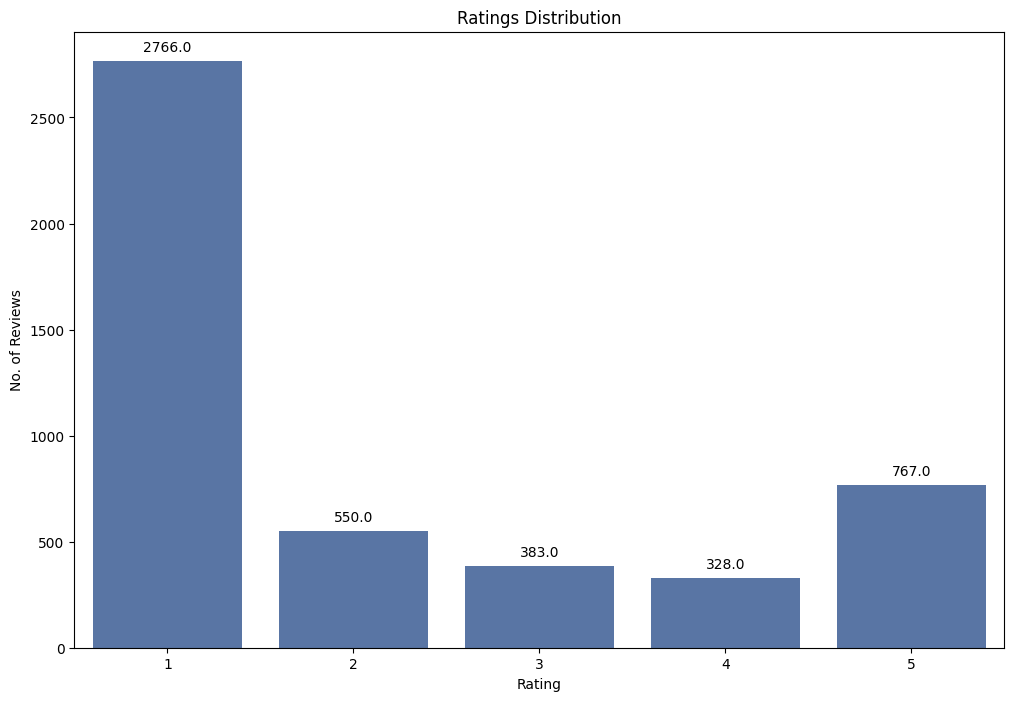

In [38]:
palette = "deep"
sns.set_palette(palette)
plt.figure(figsize=(12, 8))
# Create a countplot
ax = sns.countplot(data=filtered_df, x='Rating')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.title('Ratings Distribution')

plt.show()

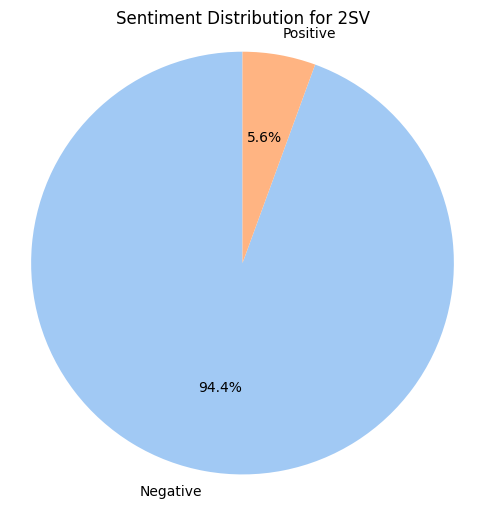

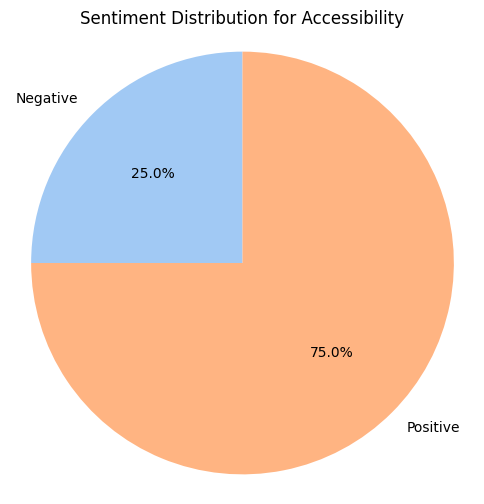

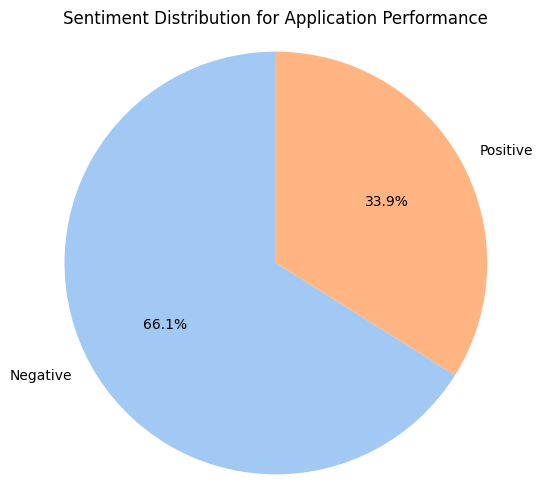

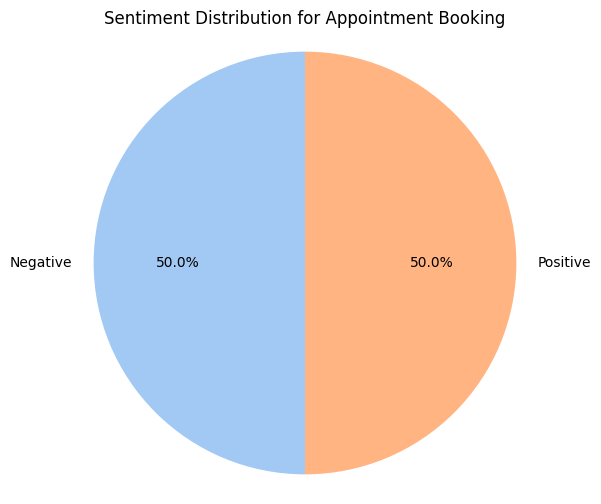

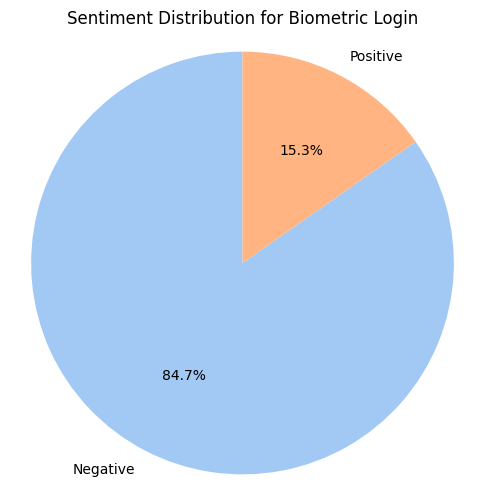

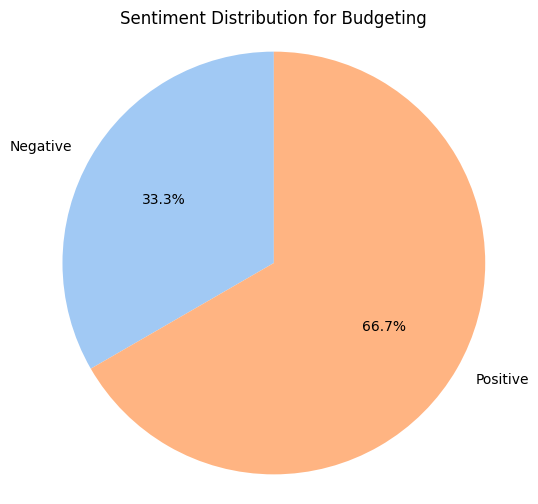

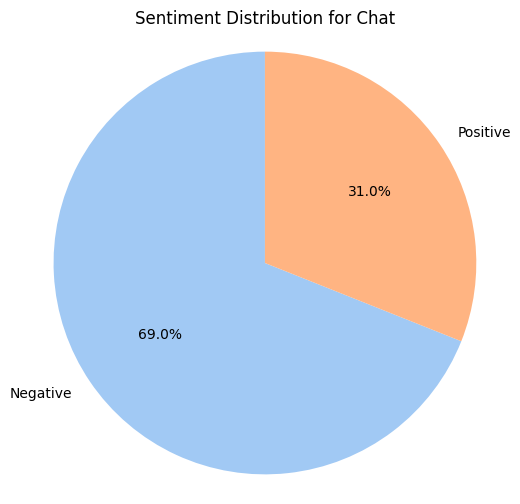

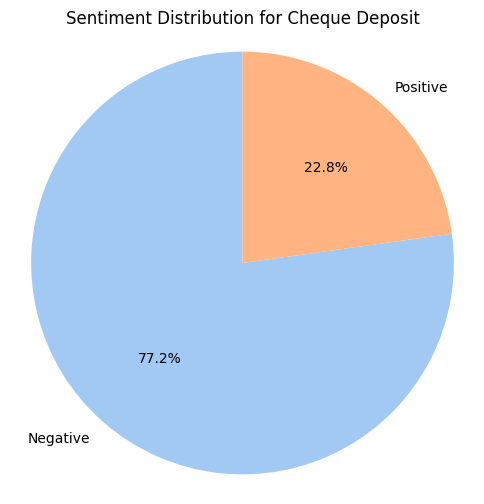

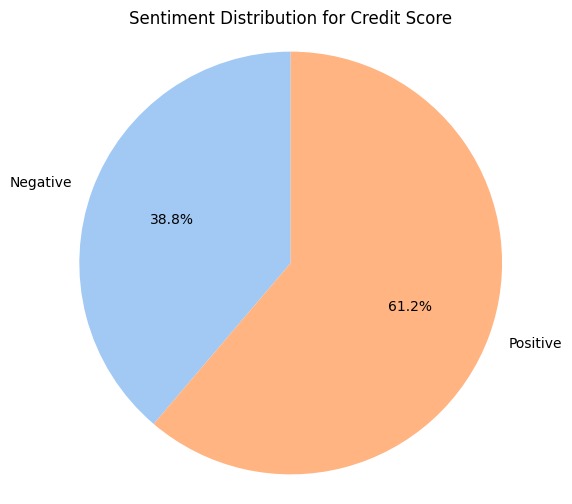

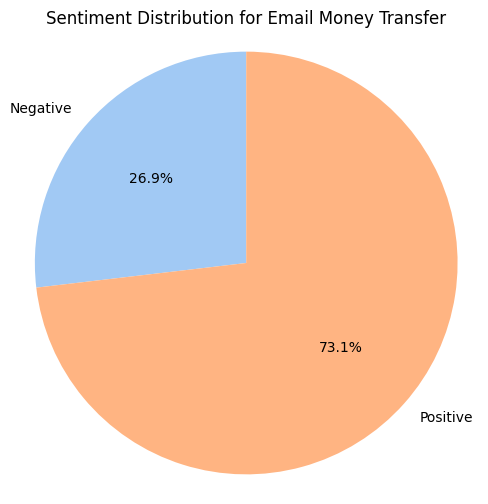

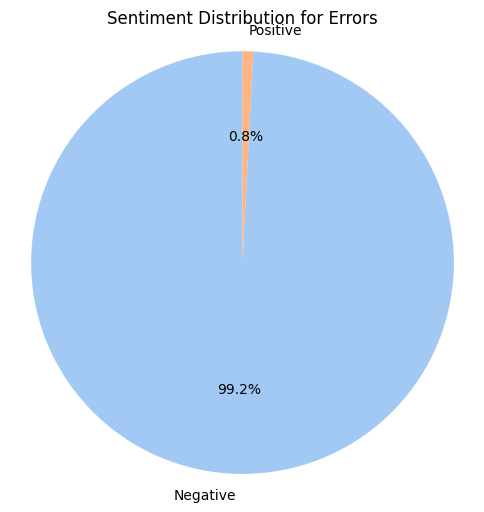

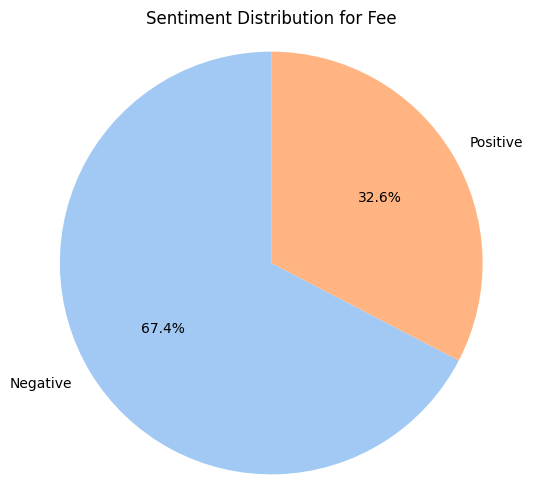

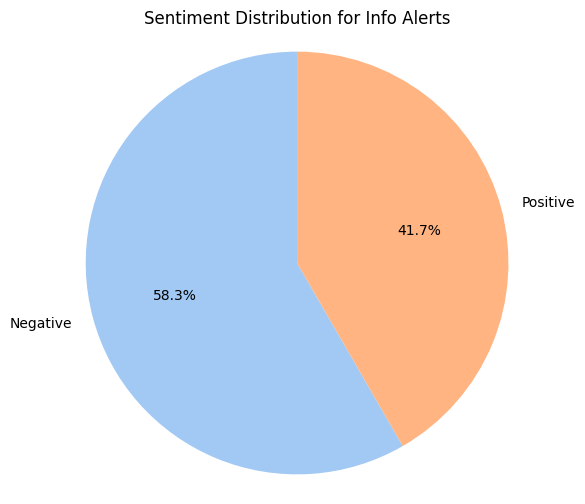

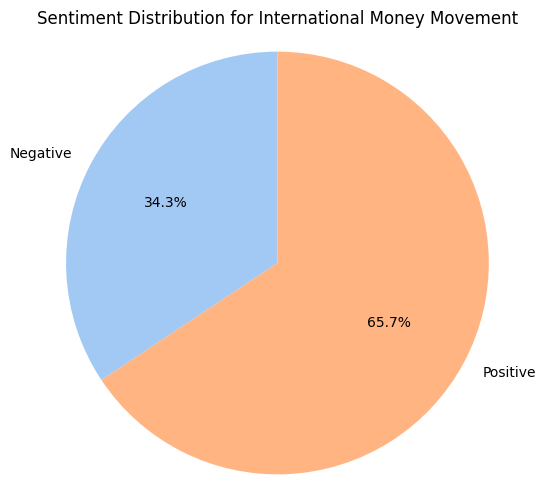

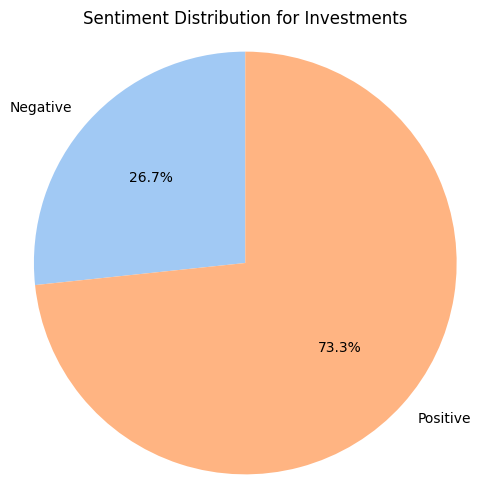

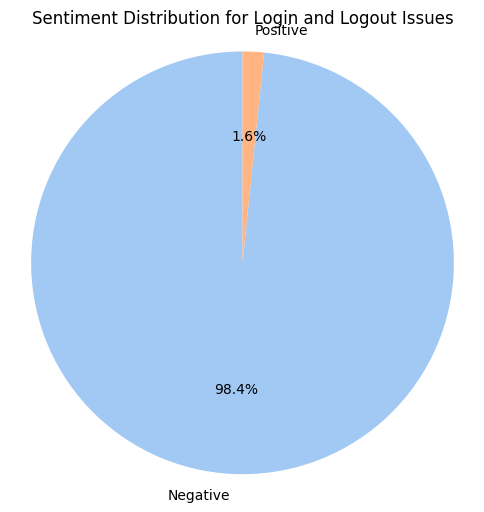

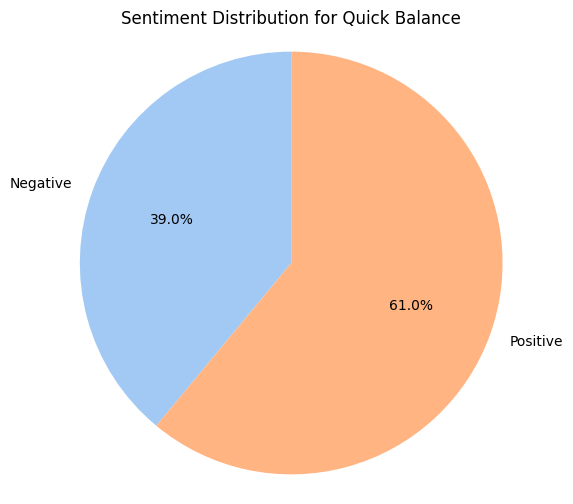

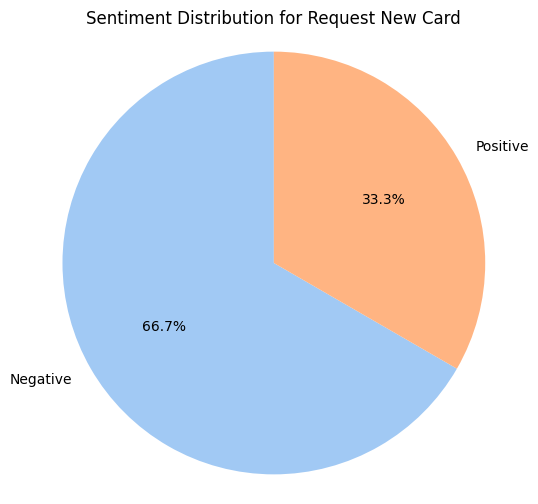

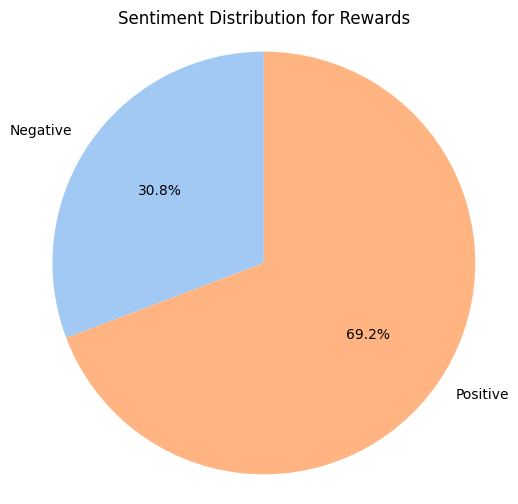

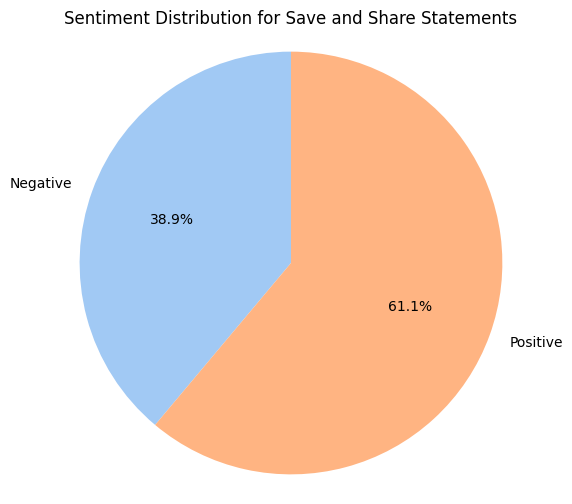

In [39]:
# Group by topic and sentiment and count occurrences
grouped_data = filtered_df.groupby(['Suggested_Topic', 'sentiment']).size().unstack().fillna(0)

# Set a pretty color palette
colors = sns.color_palette('pastel')

# Plotting pie charts for each topic
topics = grouped_data.index
for topic in topics:
    plt.figure(figsize=(6, 6))
    plt.title(f'Sentiment Distribution for {topic}')
    plt.pie(grouped_data.loc[topic], labels=grouped_data.columns, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<ipython-input-44-3bad0a84e80c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_topics.index, y=top5_topics.values, palette=colors)
<ipython-input-44-3bad0a84e80c>:12: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=top5_topics.index, y=top5_topics.values, palette=colors)


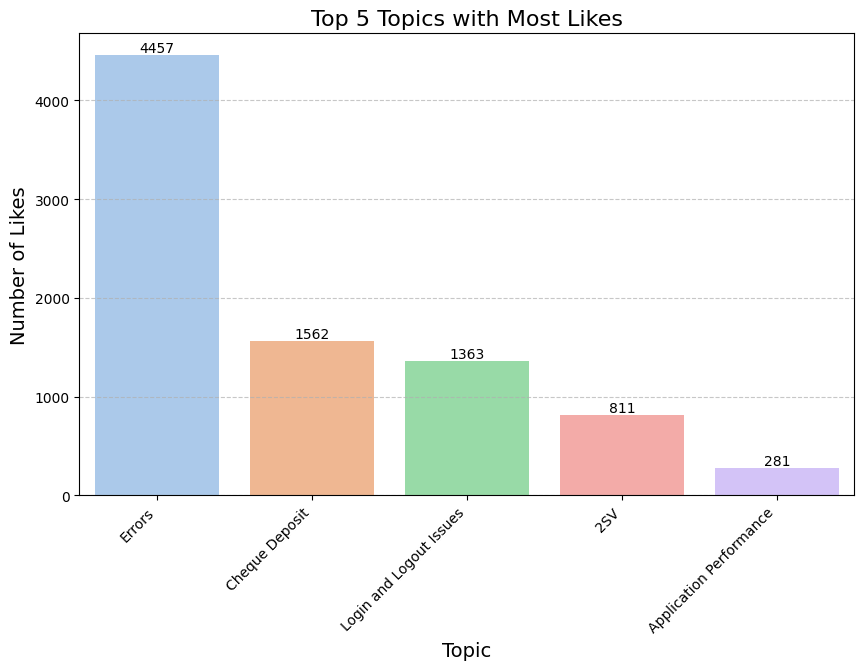

In [44]:
# Group by topic and calculate the sum of likes for each topic
likes_by_topic = filtered_df.groupby('Suggested_Topic')['Review_Likes'].sum()

# Get the top 5 topics with most likes
top5_topics = likes_by_topic.nlargest(5)

# Set a pretty color palette
colors = sns.color_palette('pastel')

# Plotting a bar plot for the top 5 topics with most likes
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_topics.index, y=top5_topics.values, palette=colors)

# Adding labels and title
plt.title('Top 5 Topics with Most Likes', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Number of Likes', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying the value on top of each bar
for i, value in enumerate(top5_topics.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [50]:
# Get the top 10 reviews with most likes
top10_reviews = filtered_df.nlargest(10, 'Review_Likes')
top10_reviews

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review,Suggested_Topic,Similarity,sentiment
1384,4012,2022-11-28 16:03:19,1,en,20.44.3,236,"If I could give this app a zero, I would. Wors...",Errors,0.836913,Negative
1518,8467,2023-05-06 02:48:04,1,en,20.49.1,229,Can the developers please remove the two-step ...,Login and Logout Issues,0.835408,Negative
3141,6767,2022-10-11 21:00:09,1,en,20.43.0,224,No quick Balance Check anymore. Worst update e...,Quick Balance,0.812515,Negative
547,446,2023-07-13 07:08:08,2,en,2306.0.1,148,I'm not able to get back in after having to un...,Login and Logout Issues,0.854367,Negative
1742,8814,2023-10-12 00:41:10,1,en,2309.0.0,145,I'm still annoyed by thus app. it's always upd...,Login and Logout Issues,0.833392,Negative
8,4148,2023-09-04 16:25:29,1,en,2308.0.0,121,I haven't been able to use the app without it ...,Errors,0.897792,Negative
1216,1770,2022-09-14 18:10:36,1,en,20.42.1,121,"About 70% of the time the app is very slow, as...",Application Performance,0.839898,Negative
362,3702,2022-10-29 08:05:30,1,en,20.43.2,104,I haven't been able to use this app since 2-st...,2SV,0.860219,Negative
477,8594,2021-12-09 15:46:14,1,en,20.34.1,94,Depositing a cheque used to be no problem at a...,Cheque Deposit,0.856449,Negative
433,6438,2023-02-15 22:08:16,1,en,20.46.2,92,The latest update mandates me to set up a 2SV ...,2SV,0.857594,Negative


In [51]:
# Calculate the average rating
average_rating = filtered_df['Rating'].mean()

print(f'The average rating of the app is: {average_rating:.2f}')

The average rating of the app is: 2.12


In [57]:
# Filter for negative sentiment
negative_df = filtered_df[filtered_df['sentiment'] == 'Negative']
valid_versions = negative_df['Version'].str.match(r'^\d{1,2}\.\d+\.\d+$') | negative_df['Version'].isna()
negative_df = negative_df[valid_versions]
# Group by 'topic', 'version', and calculate the count of negative reviews and the sum of likes for each group
grouped_data = negative_df.groupby(['Suggested_Topic', 'Version']).agg({'sentiment': 'count', 'Review_Likes': 'sum'}).reset_index()

# Find the version with the most negative complaints (based on the sum of likes and count of negative reviews) for each topic
most_negative_version = grouped_data.loc[grouped_data.groupby('Suggested_Topic')['Review_Likes'].idxmax()]

most_negative_version

,Suggested_Topic,Version,sentiment,Review_Likes
31,2SV,20.43.2,14,113
45,Accessibility,20.30.1,1,3
73,Application Performance,20.42.1,2,130
82,Appointment Booking,20.30.1,1,6
98,Biometric Login,20.34.4,1,7
116,Budgeting,20.37.1,1,1
119,Chat,20.24.0,1,0
141,Cheque Deposit,20.34.3,112,326
170,Credit Score,20.21.1,1,9
180,Email Money Transfer,20.24.0,2,11


In [61]:
# Group by 'Version' and calculate the count of negative reviews and the sum of likes for each group
grouped_data = negative_df.groupby('Version').agg({'sentiment': 'count', 'Review_Likes': 'sum'}).reset_index()

# Create a new column representing the combined metric (negative reviews + likes)
grouped_data['Combined_Metric'] = grouped_data['sentiment'] + grouped_data['Review_Likes']

# Find the version with the highest combined metric (negative reviews + likes) for the entire app
most_negative_version = grouped_data.loc[grouped_data['Combined_Metric'].idxmax()]

most_negative_version

Version            20.34.3
sentiment              203
Review_Likes           465
Combined_Metric        668
Name: 30, dtype: object

In [65]:
# Filter for negative sentiment
negative_df = filtered_df[filtered_df['sentiment'] == 'Positive']

# Filter out versions with invalid format (not matching "20.37.1") or NaN values
valid_versions = negative_df['Version'].str.match(r'^\d{1,2}\.\d+\.\d+$') | negative_df['Version'].isna()
negative_df = negative_df[valid_versions]

# Group by 'Version' and calculate the count of negative reviews and the sum of likes for each group
grouped_data = negative_df.groupby('Version').agg({'sentiment': 'count', 'Review_Likes': 'sum'}).reset_index()

# Create a new column representing the combined metric (negative reviews + likes)
grouped_data['Combined_Metric'] = grouped_data['sentiment'] + grouped_data['Review_Likes']

# Find the version with the highest combined metric (negative reviews + likes) for the entire app
most_negative_version = grouped_data.loc[grouped_data['Combined_Metric'].idxmax()]

print(most_negative_version)

Version            20.25.1
sentiment               66
Review_Likes            24
Combined_Metric         90
Name: 4, dtype: object
